In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sklearn.model_selection as sk_model_slection
%matplotlib inline

In [2]:
real_estate_price = pd.read_csv('C:/Users/Thales/Downloads/Real_estate.csv')
real_estate_price.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [3]:
real_estate_price.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
# Remove the id column
real_estate_price.drop('No', inplace=True, axis=1)

# Rename the columns (remove X1..X2..X3.. and Y)
real_estate_price.columns = ['transaction_date', 'house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude', 'house_price_of_unit_area']
real_estate_price.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
real_estate_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_date                     414 non-null    float64
 1   house_age                            414 non-null    float64
 2   distance_to_the_nearest_MRT_station  414 non-null    float64
 3   number_of_convenience_stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house_price_of_unit_area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
train_data, test_data = sk_model_slection.train_test_split(real_estate_price, test_size=0.2, random_state=1)

Drop The Outliers

In [7]:
train_data = train_data[train_data['house_price_of_unit_area']<80]
train_data = train_data[train_data['distance_to_the_nearest_MRT_station']<3000]
train_data = train_data[train_data['longitude']>121.50]

In [8]:
# train_x, test_x, train_y, test_y
train_x = np.asanyarray(train_data[['house_price_of_unit_area']])
train_y = np.asanyarray(train_data[['number_of_convenience_stores']])
test_x = np.asanyarray(test_data[['house_price_of_unit_area']])
test_y = np.asanyarray(test_data[['number_of_convenience_stores']])

In [13]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeature = PolynomialFeatures(degree=2)
train_x_poly = PolynomialFeature.fit_transform(train_x)

In [15]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
train_y_ = linear_regression.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', linear_regression.coef_)
print ('Intercept: ', linear_regression.intercept_)

Coefficients:  [[ 0.          0.26771016 -0.00170177]]
Intercept:  [-3.15066139]


Text(0, 0.5, 'Stores')

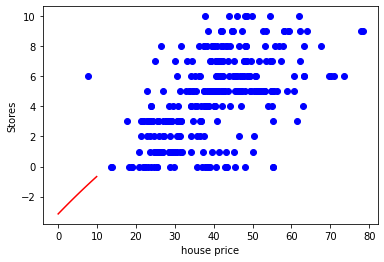

In [16]:
plt.scatter(train_data.house_price_of_unit_area, train_data.number_of_convenience_stores,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = linear_regression.intercept_[0]+ linear_regression.coef_[0][1]*XX+ linear_regression.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("house price")
plt.ylabel("Stores")

In [17]:
from sklearn.metrics import r2_score
# multiple regression: Polynomial + linear regression
test_x_poly = PolynomialFeature.transform(test_x)
test_y_ = linear_regression.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 1.82
Residual sum of squares (MSE): 5.56
R2-score: 0.37
